# 「ベイズ推論による機械学習入門」P.62 1次元ガウス分布

## 1次元ガウス分布

* 定義
$$\mathcal{N}(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\Bigr\{-\frac{(x-\mu)^2}{2\sigma^2}\Bigr\}$$
$$\mu \in \mathbb{R} \quad \sigma^2 \in \mathbb{R}^+$$

* 対数表示
$$\ln\mathcal{N}(x | \mu, \sigma^2) = -\frac{1}{2}\Bigr\{\frac{(x-\mu)^2}{\sigma^2} + \ln\sigma^2 + \ln2\pi \Bigr\}$$

### 1次元ガウス分布

In [2]:
function Gaussian(x, μ, σ)
    cons = 1 / √(2π*σ^2)
    cons .* exp.(-((x .- μ).^2 ./ 2*σ^2))
end

Gaussian (generic function with 1 method)

### パラメータの設定を変えた時の確率密度のグラフ

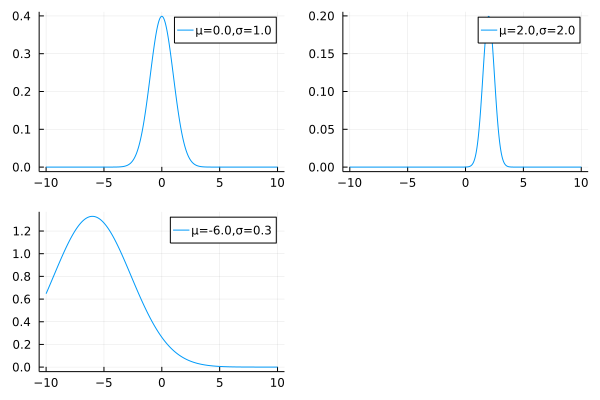

In [3]:
# xを設定
x_array = range(-10, 10, length=1000)

# パラメータの設定を変えた時の確立密度
prob_1 = Gaussian(x_array, 0.0, 1.0)
prob_2 = Gaussian(x_array, 2.0, 2.0)
prob_3 = Gaussian(x_array, -6.0, 0.3)

# 作図
using Plots
plot(plot(x_array, prob_1, label="μ=0.0,σ=1.0"),
    plot(x_array, prob_2, label="μ=2.0,σ=2.0"),
    plot(x_array, prob_3, label="μ=-6.0,σ=0.3"))

## 1次元ガウス分布同士のKL情報量

エントロピーとKL情報量は以下の定義より求めることができる。

\begin{eqnarray}
H[\mathcal{p}(\mathbf{x})] &=& - \int \mathcal{p}(\mathbf{x}) \ln \mathcal{p}(\mathbf{x})d\mathbf{x} \\
&=& -\langle \ln\mathcal{p}(\mathbf{x}) \rangle_{\mathcal{p}(\mathbf{x})}
\end{eqnarray}

\begin{eqnarray}
KL[\mathcal{q}(\mathbf{x}) \parallel \mathcal{p}(\mathbf{x})] &=& - \int \mathcal{q}(\mathbf{x}) \ln\frac{\mathcal{p}(\mathbf{x})}{\mathcal{q}(\mathbf{x})}d\mathbf{x} \\
&=& \langle \ln\mathcal{q}(\mathbf{x}) \rangle_{\mathcal{q}(\mathbf{x})} - \langle \ln\mathcal{p}(\mathbf{x}) \rangle_{\mathcal{q}(\mathbf{x})}
\end{eqnarray}

2つの形状の異なるガウス分布を以下とすると、

$$\mathcal{p}(x) = \mathcal{N}(x | \mu, \sigma^2)$$
$$\mathcal{q}(x) = \mathcal{N}(x | \hat{\mu}, \hat{\sigma}^2)$$

KL情報量は以下より求めることができる。

$$KL[\mathcal{q}(x) \parallel \mathcal{p}(x)] = -H[\mathcal{N}(x | \hat{\mu}, \hat{\sigma}^2)] - \langle \ln \mathcal{N}(x | \mu, \sigma^2) \rangle_{\mathcal{q}(x)} \quad (1)$$

まず、エントロピーの項を計算する。

\begin{eqnarray}
H[\mathcal{N}(x | \mu, \sigma^2)] &=& -\langle \ln \mathcal{N}(x | \mu, \sigma^2) \rangle \\
&=& \frac{1}{2} \langle \frac{(x-\mu)^2}{\sigma^2} + \ln \sigma^2 + \ln 2\pi \rangle \\
&=& \frac{1}{2} \Bigl( \frac{\langle x^2\rangle - 2\langle x \rangle \mu + \mu^2}{\sigma^2} + \ln \sigma^2 + \ln 2\pi \Bigl) \\
&=& \frac{1}{2}(1 + \ln \sigma^2 + \ln 2\pi) \\
\end{eqnarray}

$$ \langle x \rangle = \mu \quad \langle x^2 \rangle = \mu^2 + \sigma^2 より$$

次に期待値の項を計算する。

\begin{eqnarray}
\langle \ln \mathcal{N}(x | \mu, \sigma^2) \rangle_{\mathcal{q}(x)} &=& - \frac{1}{2} \Bigl(\frac {\langle x^2 \rangle_{\mathcal{q}(x)} - 2\langle x \rangle_{\mathcal{q}(x)}\mu + \mu^2}{\sigma^2} + \ln \sigma^2 + \ln 2\pi \Bigl) \\
&=& - \frac{1}{2} \Bigl(\frac{\hat{\mu}^2 + \hat{\sigma}^2 - 2\hat{\mu}\mu + \mu^2}{\sigma^2} + \ln \sigma^2 + \ln 2\pi \Bigl)
\end{eqnarray}

計算したエントロピーと期待値の項を(1)に代入する。

\begin{eqnarray}
KL[\mathcal{q}(x) \parallel \mathcal{p}(x)] &=& -H[\mathcal{N}(x | \hat{\mu}, \hat{\sigma}^2)] - \langle \ln \mathcal{N}(x | \mu, \sigma^2) \rangle_{\mathcal{q}(x)} \\
&=& - \frac{1}{2}(1 + \ln \sigma^2 + \ln 2\pi) + \frac{1}{2} \Bigl(\frac{\hat{\mu}^2 + \hat{\sigma}^2 - 2\hat{\mu}\mu + \mu^2}{\sigma^2} + \ln \sigma^2 + \ln 2\pi \Bigl) \\
&=& \frac{1}{2} \Bigl(\frac{\hat{\mu}^2 + \hat{\sigma}^2 - 2\hat{\mu}\mu + \mu^2}{\sigma^2} - 1 \Bigl) \\
&=& \frac{1}{2} \Bigl(\frac{(\mu - \hat{\mu})^2 + \hat{\sigma}^2}{\sigma^2} + \ln \frac{\sigma^2}{\hat{\sigma}^2} - 1 \Bigl)
\end{eqnarray}

### KL情報量

In [35]:
KL_divergence(μ, μ̂, σ, σ̂) = 0.5 * (((μ - μ̂)^2 + σ̂^2) / σ^2 + log(σ^2 / σ̂^2) - 1)

KL_divergence (generic function with 1 method)

### p(x)=N(x|0.0,1.0), q(x)=N(x|0.5,1.0)の場合

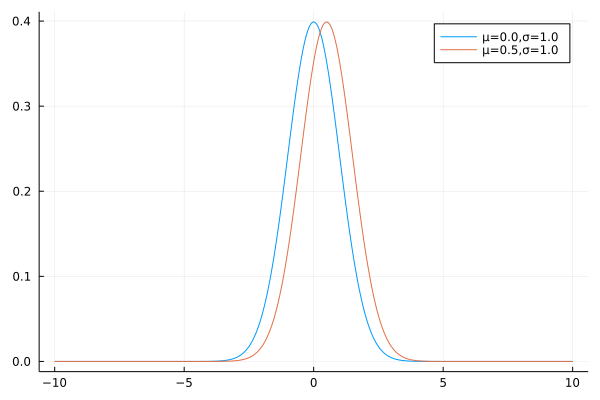

In [46]:
# 確率分布を設定
p_1 = Gaussian(x_array, 0.0, 1.0)
q_1 = Gaussian(x_array, 0.5, 1.0)

# 作図
plot(x_array, p_1, label="μ=0.0,σ=1.0")
plot!(x_array, q_1, label="μ=0.5,σ=1.0")

In [47]:
# KL情報量を計算
KL_q_1_p_1 = KL_divergence(0.0, 0.5, 1.0, 1.0)
KL_p_1_q_1 = KL_divergence(0.5, 0.0, 1.0, 1.0)
println("KL[q||p] = ", KL_q_1_p_1)
println("KL[p||q] = ", KL_p_1_q_1)

KL[q||p] = 0.125
KL[p||q] = 0.125


### p(x)=N(x|0.0,2.0),q(x)=N(x|0.0,1.0)の場合

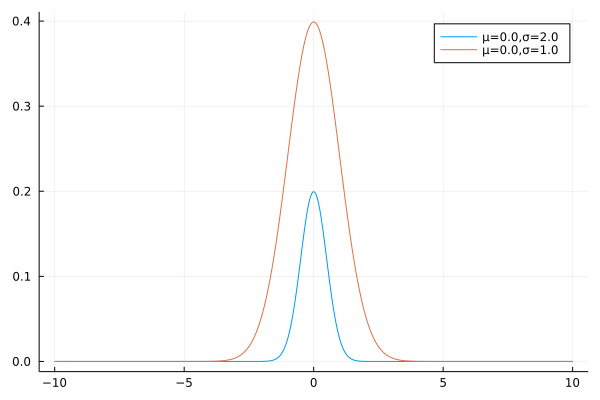

In [48]:
# 確率分布を設定
p_2 = Gaussian(x_array, 0.0, 2.0)
q_2 = Gaussian(x_array, 0.0, 1.0)

# 作図
plot(x_array, p_2, label="μ=0.0,σ=2.0")
plot!(x_array, q_2, label="μ=0.0,σ=1.0")

In [49]:
# KL情報量を計算
KL_q_2_p_2 = KL_divergence(0.0, 0.0, 2.0, 1.0)
KL_p_2_q_2 = KL_divergence(0.0, 0.0, 1.0, 2.0)
println("KL[q||p] = ", KL_q_2_p_2)
println("KL[p||q] = ", KL_p_2_q_2)

KL[q||p] = 0.3181471805599453
KL[p||q] = 0.8068528194400546


### p(x)=N(x|0.0,2.0), q(x)=N(x|2.0,1.0)の場合

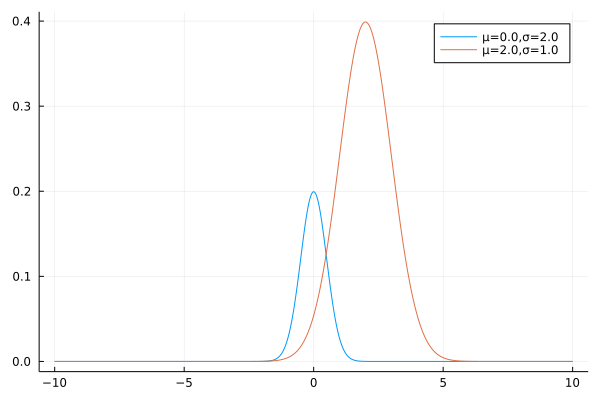

In [50]:
# 確率分布を設定
p_3 = Gaussian(x_array, 0.0, 2.0)
q_3 = Gaussian(x_array, 2.0, 1.0)

# 作図
plot(x_array, p_3, label="μ=0.0,σ=2.0")
plot!(x_array, q_3, label="μ=2.0,σ=1.0")

In [51]:
# KL情報量を計算
KL_q_3_p_3 = KL_divergence(0.0, 2.0, 2.0, 1.0)
KL_p_3_q_3 = KL_divergence(2.0, 0.0, 1.0, 2.0)
println("KL[q||p] = ", KL_q_3_p_3)
println("KL[p||q] = ", KL_p_3_q_3)

KL[q||p] = 0.8181471805599454
KL[p||q] = 2.8068528194400546
